In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from glob import glob
from scipy.stats import mannwhitneyu, ttest_ind, pearsonr, spearmanr
from tqdm import tqdm
import numpy as np 
import math
import seaborn as sns
from scipy.stats import ttest_ind


demos = ['women', 'black', 'hispanic', 'native american']
%matplotlib inline

In [3]:
def codes_to_vals(unis):
    encodings = pd.read_excel('../../data/hd2020.xlsx', sheet_name='Frequencies')
    varnames = list(encodings['varname'].unique())
    for varname in varnames:
        try:
            filtered = encodings[encodings['varname'] == varname].set_index('codevalue')
            filtered.index = filtered.index.astype(int)
            mapping = filtered['valuelabel'].to_dict()
            unis[varname] = unis[varname].replace(mapping)
        except:
            continue
    return unis

In [28]:
trends = pd.read_csv('../../out/trends_black.csv', index_col=0)
trend = pd.read_csv('../../out/trends.csv', index_col=0)

unis = pd.read_csv('../../data/IPEDS/university_info/hd2021.csv', encoding='latin-1', index_col=0)

unis = codes_to_vals(unis)

unis_stats = pd.merge(unis, trends, left_index=True, right_index=True)

Text(0.5, 1.0, 'Women CS and Non-CS Correlations')

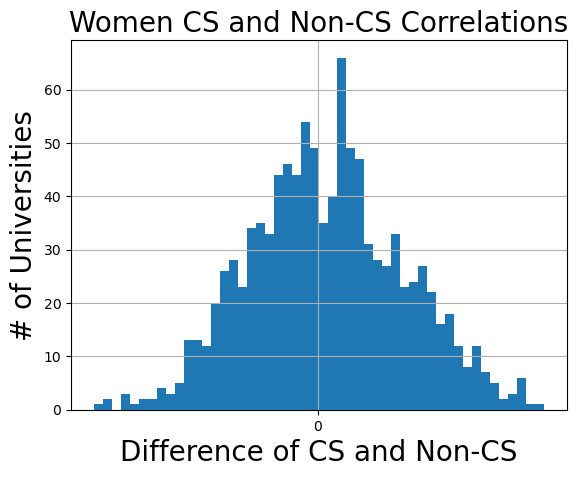

In [18]:
(unis_stats['cs_stat']-unis_stats['noncs_stat']).hist(bins=50)
plt.xticks([0]);
plt.ylabel('# of Universities', fontsize=20)
plt.xlabel('Difference of CS and Non-CS', fontsize=20)
plt.title('Women CS and Non-CS Correlations', fontsize = 20)

<Figure size 640x480 with 0 Axes>

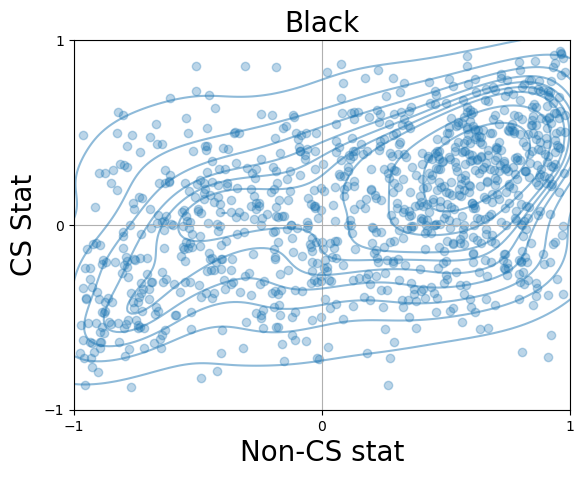

<Figure size 640x480 with 0 Axes>

In [29]:
plt.scatter(unis_stats['noncs_stat'], \
            unis_stats['cs_stat'],  alpha=0.3)
sns.kdeplot(unis_stats['noncs_stat'], \
            y=unis_stats['cs_stat'],  alpha=0.5)
plt.title('Black', fontsize=20)
plt.xticks([-1, 0, 1]);
plt.yticks([-1, 0, 1]);
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel('Non-CS stat',fontsize=20)
plt.ylabel('CS Stat', fontsize=20)
plt.grid()
plt.figure()

In [255]:
# plt.figure(figsize=(20, 10))
# sns.boxplot(x='quadrant', y='INSTSIZE', data=unis_stats)#, order=unis_stats.groupby('STABBR').mean().sort_values('cs_stat', ascending=False).index)
# plt.plot(range(15), [0]*15, 'r--', linewidth=10);

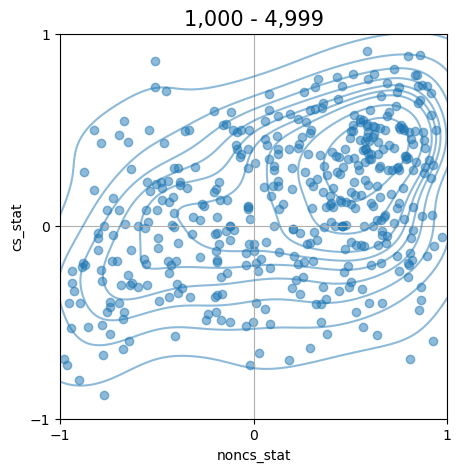

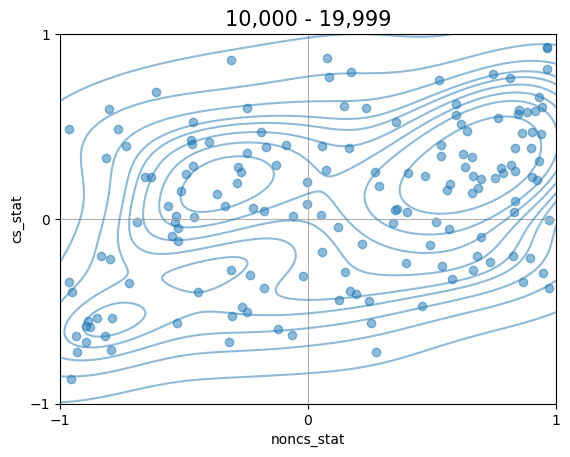

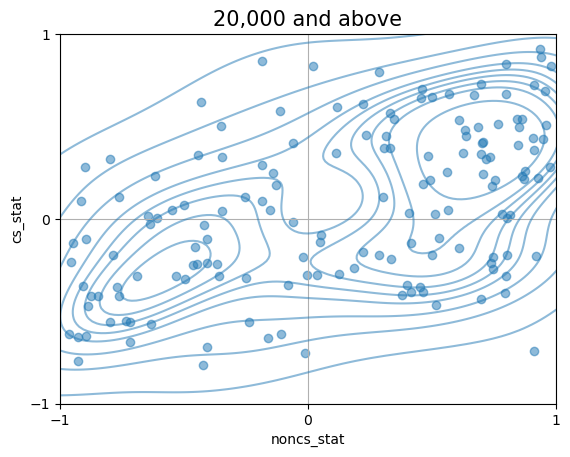

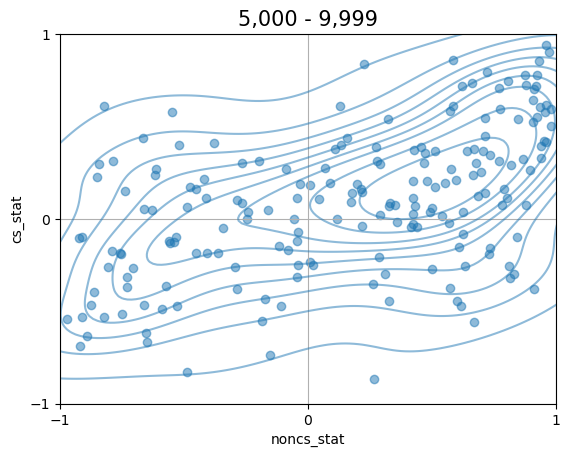

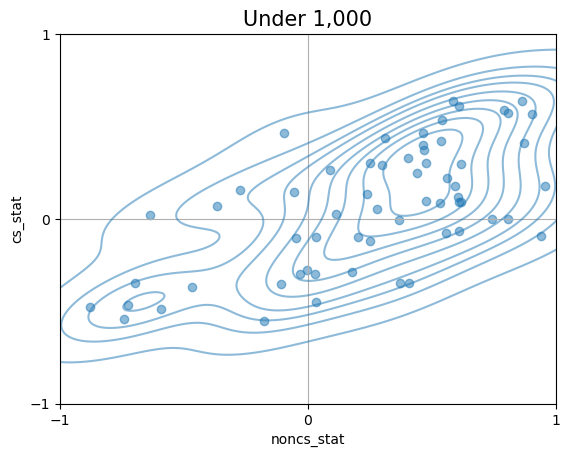

<Figure size 640x480 with 0 Axes>

In [90]:
se = unis_stats[unis_stats['OBEREG'] == 5]

df =  unis_stats #unis_stats # se

plt.figure(figsize=(5, 5))
# unis_stats['OBEREG'] = unis_stats['OBEREG'].replace({1: 'New England', 2: 'Mid East', 3: 'Great Lakes', 4: 'Plains', 5: 'Southeast', 6: 'Southwest', 7: 'Rocky Mountains', 8: 'Far West', 9: 'Outlying Areas'})

col = 'INSTSIZE'
for reg in sorted(df[col].unique()):
    plt.scatter(df[df[col]==reg]['noncs_stat'], \
                df[df[col]==reg]['cs_stat'], \
                label=reg, alpha=0.5)
    sns.kdeplot(df[df[col]==reg]['noncs_stat'], \
                y=df[df[col]==reg]['cs_stat'], \
                label=reg, alpha=0.5)
    plt.title(reg, fontsize=15)
    plt.xticks([-1, 0, 1]);
    plt.yticks([-1, 0, 1]);
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    plt.grid()
    plt.figure()
# sns.scatterplot(data=unis_stats, x='cs_stat', y='noncs_stat', hue='OBEREG', alpha=0.9);

In [ ]:
plt.scatter(unis_stats['Average Undergraduate Tuition and Fees'], unis_stats['noncs_stat'], alpha=0.5)

In [271]:
trends = pd.read_csv('../../out/trends_black.csv', index_col=0)
trends['diff_stat'] = trends['cs_stat'] - trends['noncs_stat']
unis = pd.read_csv('../../data/IPEDS/university_info/hd2021.csv', encoding='latin-1', index_col=0)
scottg = pd.read_excel('../../data/US Higher Education_ Value vs. Vulnerability.xlsx', skiprows=5)
merged = pd.merge(unis['INSTNM'].reset_index(), scottg, right_on='Institution Name', left_on='INSTNM')
merged.set_index('UNITID', inplace=True)
del merged['Institution Name']
unis_stats = pd.merge(merged, trends, left_index=True, right_index=True)
unis_stats.corr(method='pearson')['diff_stat'].sort_values(ascending=False)

diff_stat                                             1.000000
quadrant                                              0.544324
cs_stat                                               0.347625
noncs_pval                                            0.211439
Undergraduate Admit Rate Pct Rank                     0.067157
Rank Pct Rank                                         0.043466
Instructional Wages per Full-Time Student PCT Rank    0.023154
Credential Score                                      0.019036
Average Undergraduate Tuition & Fees Score            0.016843
Average Undergraduate Tuition and Fees                0.014818
Endowment per Full Time Student                       0.013135
Instructional Wages per Full-Time Student             0.002283
Education Score                                       0.001689
Percentage of International Students                  0.000295
Percentage of International Students PCT Rank        -0.000282
Value\n(C x E x E)                                   -0

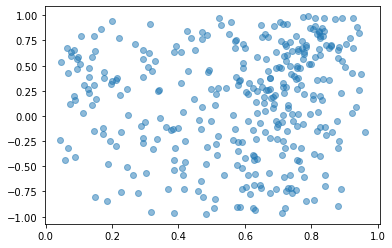

In [258]:
plt.scatter(unis_stats['Undergraduate Admit Rate'], unis_stats['noncs_stat'], alpha=0.5)
# plt.xscale('log')